In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy as np

In [2]:
grid = [
    [0,0,0,0,4,3,0,0,2],
    [1,2,8,0,0,0,7,0,0],
    [0,5,0,0,0,1,0,8,9],
    [9,0,2,0,8,4,3,0,0],
    [7,0,0,6,0,9,0,0,1],
    [0,0,5,2,3,0,4,0,6],
    [4,9,0,3,0,0,0,5,0],
    [0,0,7,0,0,0,1,6,3],
    [2,0,0,5,7,0,0,0,0]
]

In [3]:
grid1 = [
    [0,0,0,0,0,0,0,0,0],
    [0,2,7,0,0,0,8,9,0],
    [6,0,8,0,1,0,3,0,4],
    [0,1,0,5,0,4,0,8,0],
    [0,0,9,0,0,0,5,0,0],
    [0,6,0,8,0,9,0,3,0],
    [1,0,2,0,8,0,9,0,3],
    [0,5,4,0,0,0,6,2,0],
    [0,0,0,0,0,0,0,0,0]
]

In [4]:
grid2 = [
    [3,4,0,0,0,0,0,0,6],
    [0,9,0,7,0,0,0,0,0],
    [8,0,0,0,2,0,1,0,0],
    [0,0,7,0,3,0,5,0,0],
    [0,0,0,9,0,7,0,0,0],
    [0,0,4,0,1,0,2,0,0],
    [0,0,1,0,6,0,0,0,8],
    [0,0,0,0,0,9,0,1,0],
    [2,0,0,0,0,0,0,3,4]
]

In [5]:
def initialise_graph(grid, sudoku_size):
    p = sudoku_size*sudoku_size
    G = nx.sudoku_graph(sudoku_size)
    for i in range(p):
        for j in range(p):
            G.nodes[i*9+j]["val"] = grid[i][j]
            if(G.nodes[i*9+j]["val"]>0):
                G.nodes[i*9+j]["change"] = 0
            else:
                G.nodes[i*9+j]["change"] = 1
    return G


In [6]:
def greedy_graph_color(G, val):
    
    nodes = list(G.nodes())
    for n in nodes:
        if(G.nodes[n]["change"]==1):
            edges = list(G.neighbors(n))
            check = np.ones(len(val))
            for neigh in edges:
                x = G.nodes[neigh]["val"]
                if(x>0):
                    check[x-1] = 0
            new = np.argmax(check)
            if(np.sum(check)==0):
                print(" Greedy can't solve \n")
                old = len(val)
                val.append(old+1)
                new = old
            G.nodes[n]["val"] = new+1

    return G, len(val)


In [7]:
def my_print(sol, size):
    p = size*size
    for i in range(p):
        for j in range(p):
            print(sol.nodes[i*9+j]["val"],  end =" ")
        print()

In [8]:
size = 3
G = initialise_graph(grid, size)

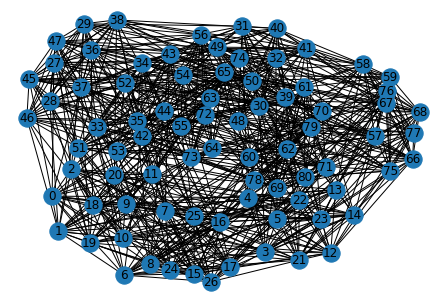

In [9]:
nx.draw(G, with_labels= True)
plt.savefig("label_graph.png")

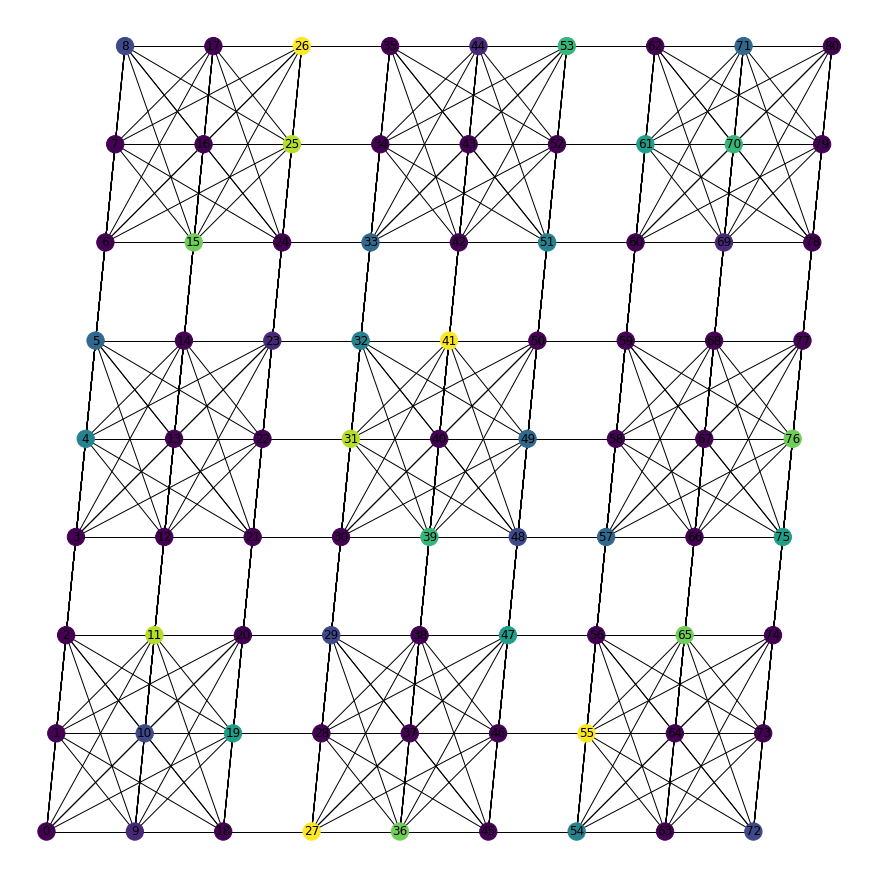

In [14]:
color_nodes = [data['val'] for v, data in G.nodes(data=True)]
position = []
G_new = nx.sudoku_graph(3)
for i in range(81):
    position.append((i/9,i%9))
fig = plt.figure(figsize=(12,12))    
nx.draw(G_new, node_color = color_nodes, pos=position, with_labels=True)



In [255]:
val = [1,2,3,4,5,6,7,8,9]
sol, check = greedy_graph_color(G, val)

 Greedy can't solve 

 Greedy can't solve 

 Greedy can't solve 



In [256]:
my_print(sol,3)

6 7 9 8 4 3 5 1 2 
1 2 8 9 5 6 7 3 4 
3 5 4 7 2 1 6 8 9 
9 1 2 10 8 4 3 7 5 
7 3 10 6 11 9 2 12 1 
8 11 5 2 3 7 4 9 6 
4 9 1 3 6 2 8 5 7 
5 8 7 4 9 10 1 6 3 
2 6 3 5 7 8 9 4 10 


In [257]:
size = 3
G = initialise_graph(grid1, size)
val = [1,2,3,4,5,6,7,8,9]
sol, check = greedy_graph_color(G, val)
my_print(sol,3)

 Greedy can't solve 

 Greedy can't solve 

 Greedy can't solve 

3 4 1 2 5 6 7 10 11 
5 2 7 3 4 10 8 9 1 
6 9 8 7 1 11 3 5 4 
2 1 3 5 6 4 10 8 7 
4 7 9 1 2 3 5 6 12 
10 6 5 8 7 9 1 3 2 
1 10 2 4 8 5 9 7 3 
7 5 4 9 3 1 6 2 8 
8 3 6 10 11 2 4 1 5 


In [258]:
size = 3
G = initialise_graph(grid2, size)
val = [1,2,3,4,5,6,7,8,9]
sol, check = greedy_graph_color(G, val)
my_print(sol,3)

 Greedy can't solve 

 Greedy can't solve 

 Greedy can't solve 

3 4 2 1 5 8 7 9 6 
1 9 5 7 4 3 8 2 10 
8 6 10 11 2 12 1 4 3 
6 1 7 2 3 4 5 8 9 
5 2 3 9 8 7 4 6 1 
9 8 4 5 1 6 2 7 11 
4 3 1 10 6 2 9 5 8 
7 5 6 3 11 9 10 1 2 
2 10 8 12 7 1 6 3 4 


The simple greedy algo doesn't work because there is no back tracking the numbers will be randomly filled and the validation of the numbers is not checked later using this algo.

# open source implementation

In [260]:
def dfs(row, col):
    if row == 9: return True
    if col == 9: return dfs(row + 1, 0)
    if board[row][col] != '.': return dfs(row, col + 1)
    for c in range(1, 10):
        if not isValid(row, col, str(c)): continue
        board[row][col] = str(c)
        if dfs(row, col + 1): return True
        board[row][col] = '.'
    return False

def isValid(row , col, c):
    for i in range(9):
        if board[row][i] != '.' and board[row][i] == c: return False
        if board[i][col] != '.' and board[i][col] == c: return False
    for i in range(3):
        for j in range(3):
            baseRow, baseCol = row - row%3, col - col %3
            current = board[baseRow + i][ baseCol + j]
            if current != '.' and current == c: return False
    return True

In [261]:
#sudoku-easy
board=[['.' for i in range(9)] for i in range(9)]
for i in range(9):
    for j in range(9):
        if(grid[i][j]):
            board[i][j]=str(grid[i][j])
dfs(0,0)
for i in range(9):
    for j in range(9):
        grid[i][j]=int(board[i][j])
res=grid
sudoku_colors=[]
for i in range(9):
    for j in range(9):
        print(res[i][j],end=" ")
    print()

6 7 9 8 4 3 5 1 2 
1 2 8 9 6 5 7 3 4 
3 5 4 7 2 1 6 8 9 
9 6 2 1 8 4 3 7 5 
7 4 3 6 5 9 8 2 1 
8 1 5 2 3 7 4 9 6 
4 9 6 3 1 8 2 5 7 
5 8 7 4 9 2 1 6 3 
2 3 1 5 7 6 9 4 8 


In [262]:
#sudoku-Medium
board=[['.' for i in range(9)] for i in range(9)]
for i in range(9):
    for j in range(9):
        if(grid1[i][j]):
            board[i][j]=str(grid1[i][j])
dfs(0,0)
for i in range(9):
    for j in range(9):
        grid1[i][j]=int(board[i][j])
res=grid1
sudoku_colors=[]
for i in range(9):
    for j in range(9):
        print(res[i][j],end=" ")
    print()

3 4 1 7 9 8 2 6 5 
5 2 7 6 4 3 8 9 1 
6 9 8 2 1 5 3 7 4 
2 1 3 5 6 4 7 8 9 
7 8 9 3 2 1 5 4 6 
4 6 5 8 7 9 1 3 2 
1 7 2 4 8 6 9 5 3 
9 5 4 1 3 7 6 2 8 
8 3 6 9 5 2 4 1 7 


In [263]:
#sudoku-Hard
board=[['.' for i in range(9)] for i in range(9)]
for i in range(9):
    for j in range(9):
        if(grid2[i][j]):
            board[i][j]=str(grid2[i][j])
dfs(0,0)
for i in range(9):
    for j in range(9):
        grid2[i][j]=int(board[i][j])
res=grid2
sudoku_colors=[]
for i in range(9):
    for j in range(9):
        print(res[i][j],end=" ")
    print()

3 4 2 5 9 1 8 7 6 
1 9 6 7 8 3 4 5 2 
8 7 5 4 2 6 1 9 3 
6 1 7 8 3 2 5 4 9 
5 2 8 9 4 7 3 6 1 
9 3 4 6 1 5 2 8 7 
7 5 1 3 6 4 9 2 8 
4 8 3 2 7 9 6 1 5 
2 6 9 1 5 8 7 3 4 


# Q 2 c

In [18]:
import pandas as pd
import itertools

In [19]:
def greedy_graph_coloring_scheduling(network, colors):
    nodes = list(network.nodes())
    flag_solved = True
    for node in nodes :
        node_neighbours = list(network.neighbors(node))
        avail_colors = [True]*len(colors)

        for neighbour in node_neighbours:
            neigh_color = network.nodes[neighbour]["color"]
            if(neigh_color!=0):
                avail_colors[neigh_color-1] = False

        first_avail_color = np.argmax(avail_colors)

        if(avail_colors[first_avail_color] == True):
                network.nodes[node]["color"] = first_avail_color + 1
        else :
            flag_solved = False
            colors.append(len(avail_colors)+1)
            network.nodes[node]["color"] = len(avail_colors)+1
            
    if flag_solved == False :
        print("Unable to solve Scheduling with given slots")
    
    return network, colors 


273


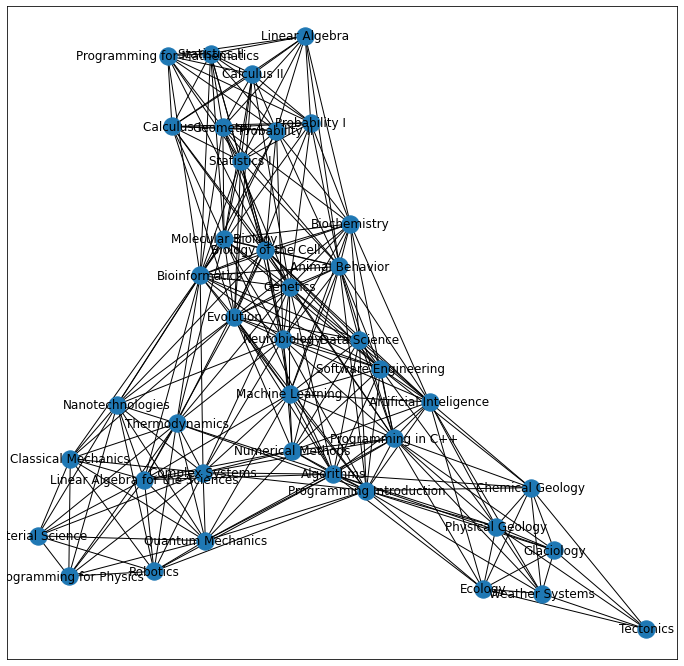

In [20]:

student_data = pd.read_csv("./synthetic_school_enrollment_data.csv",index_col=0)
courses = list(student_data.columns)[2:]

class_network = nx.Graph()
class_network.add_nodes_from(courses)

without_subj = student_data.drop(['Major','Minor'], axis=1) 
without_subj = without_subj.T

name_list=without_subj.columns
list_of_overlaps = []
for student in name_list:
    list_of_overlaps.append(list(without_subj.loc[without_subj[student]].index))
    
for sublist in list_of_overlaps:
    for pair in itertools.combinations(sublist, 2):
        class_network.add_edge(pair[0], pair[1])
n_edges_total = len(list(class_network.edges))
print(n_edges_total)

for node in class_network.nodes():
    class_network.nodes[node]["color"] = 0
    
n_nodes = len(list(class_network.nodes))
n_edges_possible = (n_nodes*(n_nodes-1))/2

fig = plt.figure(figsize=(12,12))
nx.draw_networkx(class_network, with_labels=True)
    
colors = []
for i in range(1,25):
    colors.append(i)
    
from datetime import datetime
dates = []
calendar = {}
for i in list(range(14,20)):
    for j in list(range(10,18,2)):
        date = datetime(2021, 6, i, j, 0)
        dates.append(date)
        calendar[date] = []
    
from_color_to_date = {col: dates[i] for i, col in enumerate(colors)}




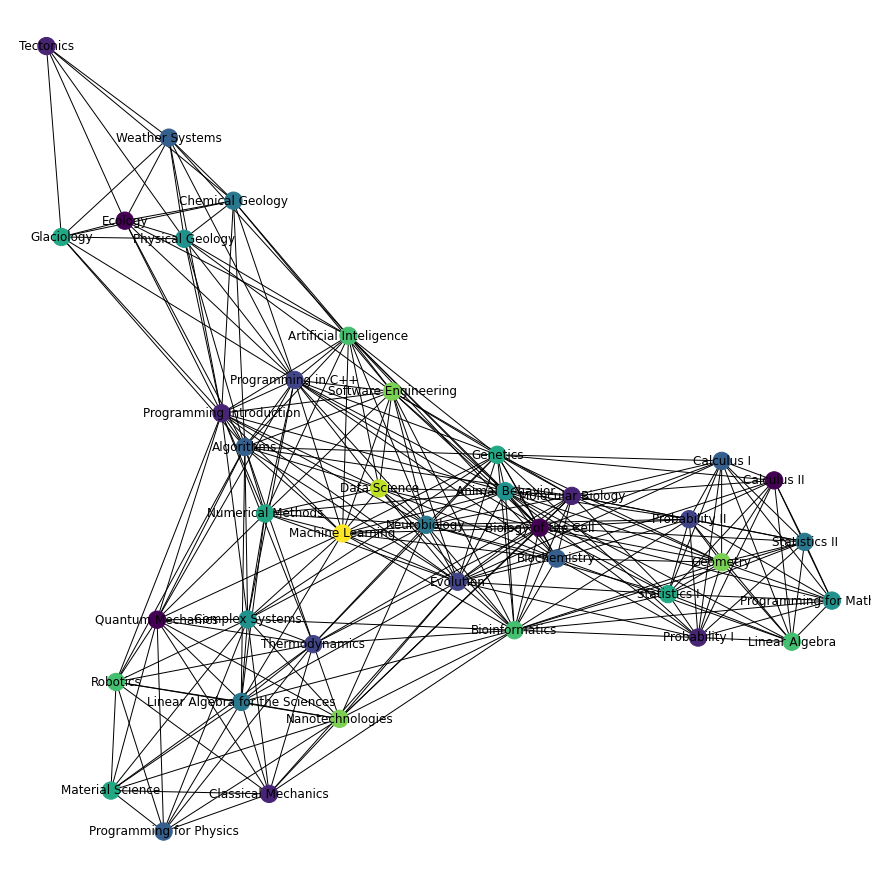

In [21]:
class_network_output, colors_output = greedy_graph_coloring_scheduling(class_network, colors)
colors_nodes = [data['color'] for v, data in class_network_output.nodes(data=True)] 
fig = plt.figure(figsize=(12,12))
nx.draw(class_network_output, node_color=colors_nodes, with_labels=True)


In [22]:
for v, data in class_network_output.nodes(data=True):
    calendar[from_color_to_date[data['color']]].append(v)
max_number_exams_sync = len(max(list(calendar.values()),key=len))
rooms = ["Room "+str(i) for i in list(range(max_number_exams_sync))]
schedule=pd.DataFrame.from_dict(calendar, orient='index', columns=rooms)




In [23]:

schedule


,Room 0,Room 1,Room 2,Room 3,Room 4
2021-06-14 10:00:00,Biology of the Cell,Quantum Mechanics,Calculus II,Ecology,None
2021-06-14 12:00:00,Molecular Biology,Classical Mechanics,Probability I,Programming Introduction,Tectonics
2021-06-14 14:00:00,Evolution,Thermodynamics,Probability II,Programming in C++,None
2021-06-14 16:00:00,Biochemistry,Programming for Physics,Calculus I,Algorithms,Weather Systems
2021-06-15 10:00:00,Neurobiology,Linear Algebra for the Sciences,Statistics II,Chemical Geology,None
2021-06-15 12:00:00,Animal Behavior,Complex Systems,Programming for Mathematics,Physical Geology,None
2021-06-15 14:00:00,Genetics,Material Science,Statistics I,Numerical Methods,Glaciology
2021-06-15 16:00:00,Bioinformatics,Robotics,Linear Algebra,Artificial Inteligence,None
2021-06-16 10:00:00,Nanotechnologies,Geometry,Software Engineering,None,None
2021-06-16 12:00:00,Data Science,None,None,None,None
